c:\Users\HAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


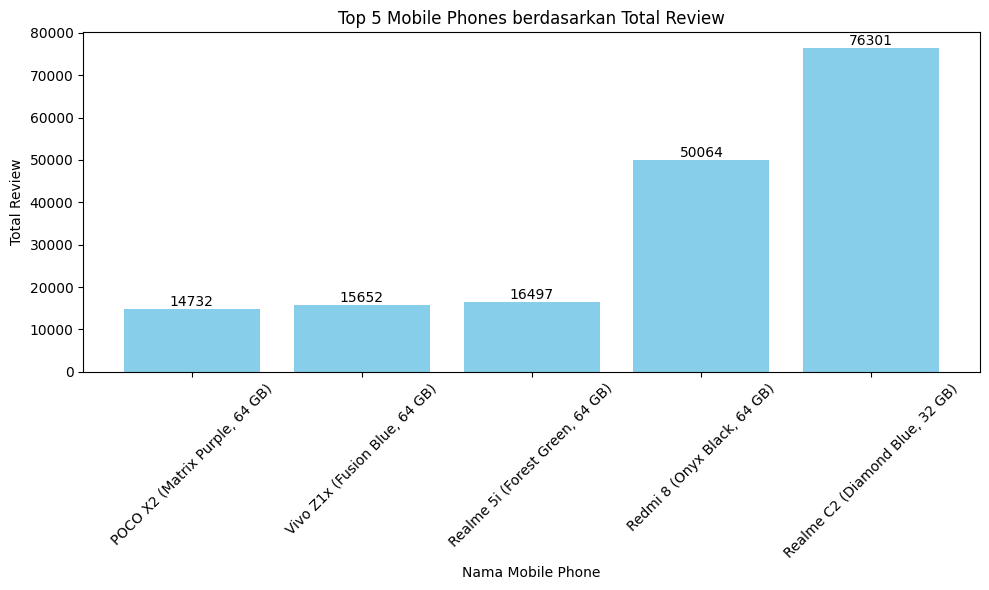

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('MobilePhones.csv')  # Pastikan mengganti 'nama_file.csv' dengan nama file yang benar

# Menghitung total review untuk setiap nama mobile phone
review_totals = data.groupby('MobileName')['Reviews'].sum().reset_index()

# Menerapkan KMeans untuk mengelompokkan data
kmeans = KMeans(n_clusters=5)
review_totals['Cluster'] = kmeans.fit_predict(review_totals[['Reviews']])

# Menghitung total review untuk setiap cluster
cluster_review_totals = review_totals.groupby('Cluster')['Reviews'].sum()

# Memilih lima ponsel dengan total review berbeda dan berurutan
top_5_mobiles = review_totals.groupby('MobileName')['Reviews'].sum().sort_values().drop_duplicates().tail(5).reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_mobiles['MobileName'], top_5_mobiles['Reviews'], color='skyblue')
plt.title('Top 5 Mobile Phones berdasarkan Total Review')
plt.xlabel('Nama Mobile Phone')
plt.ylabel('Total Review')
plt.xticks(rotation=45)
plt.tight_layout()

# Menambahkan label total review di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.show()


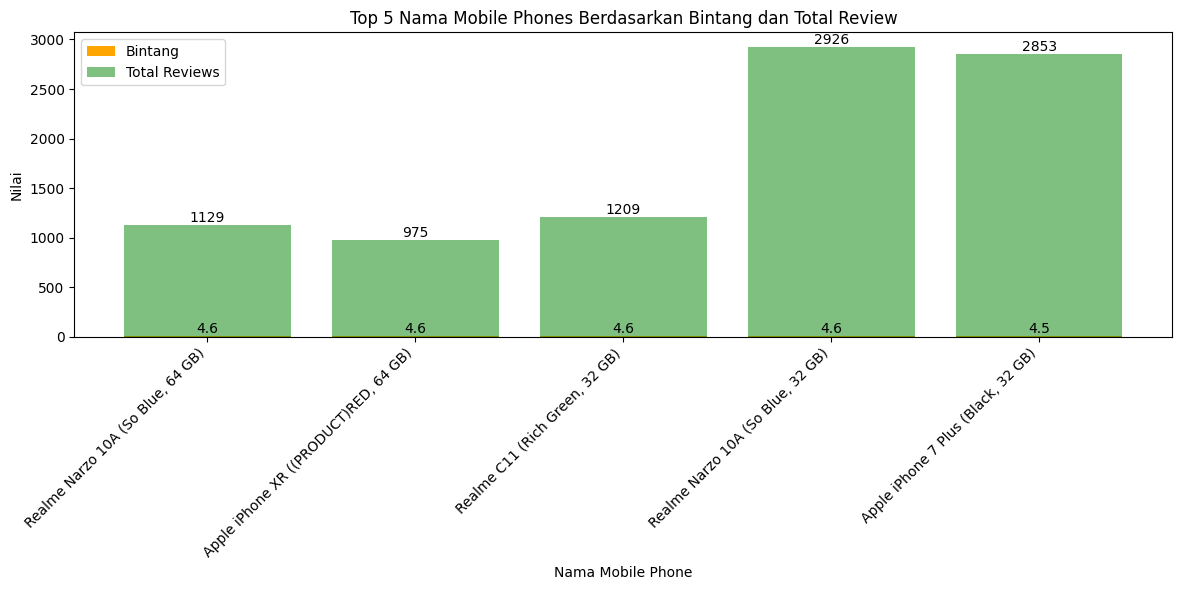

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('MobilePhones.csv')  # Ganti 'nama_file.csv' dengan nama file yang benar

# Menghitung rata-rata bintang dan total review untuk setiap nama mobile phone
stats_average = data.groupby('MobileName')[['Stars', 'Reviews']].mean().drop_duplicates().reset_index()

# Menghitung total review untuk setiap nama mobile phone
total_reviews = data.groupby('MobileName')['Reviews'].sum().reset_index()

# Menggabungkan data total review dengan data rata-rata bintang
stats_combined = pd.merge(stats_average, total_reviews, on='MobileName', how='inner')

# Mengambil lima ponsel dengan nilai bintang yang berbeda dan berurutan
top_5 = stats_combined.sort_values('Stars', ascending=False).drop_duplicates(subset='MobileName').head(5)

# Plotting grafik Top 5 mobile phones berdasarkan nilai bintang dan total review
plt.figure(figsize=(12, 6))

bars_stars = plt.bar(top_5['MobileName'], top_5['Stars'], color='orange', label='Bintang')
bars_total_reviews = plt.bar(top_5['MobileName'], top_5['Reviews_y'], color='green', alpha=0.5, label='Total Reviews')

plt.xlabel('Nama Mobile Phone')
plt.ylabel('Nilai')
plt.title('Top 5 Nama Mobile Phones Berdasarkan Bintang dan Total Review')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Menambahkan detail nilai bintang dan total review di atas setiap bar
for i, (bar_stars, bar_reviews) in enumerate(zip(bars_stars, bars_total_reviews)):
    yval_stars = bar_stars.get_height()
    yval_reviews = bar_reviews.get_height()
    plt.text(bar_stars.get_x() + bar_stars.get_width() / 2, yval_stars, f"{round(yval_stars, 2)}", va='bottom', ha='center')
    plt.text(bar_reviews.get_x() + bar_reviews.get_width() / 2, yval_reviews, f"{int(yval_reviews)}", va='bottom', ha='center')

plt.show()


In [1]:
# Import library pandas
import pandas as pd

# Baca data dari file CSV
data = pd.read_csv("MobilePhones.csv")

# Hitung total review
total_reviews = data["Reviews"].sum()

# Print total review
print(f"Total review semua smartphone: {total_reviews}")


Total review semua smartphone: 572070
